I now realize hastags may be another interesting add on, like #nbapreseason vs #nbafinals. Clearly one of those is more interesting than the other, and perhaps that would lead to a different engagment rate. 


In an exploratory study I'll find the most common hashtags, and plot their engagement rates. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('husl')
%matplotlib inline

/Users/noahkasmanoff/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
instas = pd.read_csv('Business Analytics/training_set.csv',encoding = 'unicode_escape')

In [3]:
def get_postscount(z,driver):
    """
    
    Obtains total number of posts to use a given hashtag, found in hashtag df. 
    
    Parameters
    ----------
    
    z : str
        The hashtag name, done via an apply statement. 
        
    driver : WebDriver
        Selenium webdriver object, used to naviagate to the URL of each account, and then grab the corresponding
        followers. 
        
    Returns 
    -------
    
    nposts : float
        The number of posts of that particular hashtag. 

    """
    from time import sleep
    from random import randint
    print("Hashtag: ", z)
    
    z = z.replace('#','')#.replace(' ','').replace('Â','').replace('å','').replace('â','') #clean unnecesary characters
   # print("Account: ", z)
    url = "https://www.instagram.com/explore/tags/" + z +"/?hl=en"
    driver.get(url)
    sleep(randint(1,3))
    try:
        nposts = driver.find_elements_by_class_name('g47SY')[0].text #total number of posts to use this hastag. 
    except:
        nposts = 1 #this was a type or something
        print(z , 'is a typo')
    print("# of posts with this hashtag = " , nposts)
    return nposts


def load_hashtags(instas):
    """
    
    Creates a dataset summarizing the instagram hashtags used in the post. 
    The columns used are a temporary list, and this line will be finalized once it is. 
    
    
    Parameters
    ----------
    
    instas : df
        Dataframe of the instagram posts, their associated information + output of engagements
        
        
    Returns
    -------
    
    
    hastag_df : df
    
        Dataframe of the hashtagss tagged in any or multiple posts. 
        
    """
    #use regular expression to obtain any time a name is used, find all
    import re
    instas['Description'] = instas['Description'].str.lower()

    posts = " ".join(instas['Description'].unique())
    hashtags = list( dict.fromkeys(re.findall('#[a-z_0-9]*',posts)) ) 
   # print("Total profiles: ", len(tagged_profiles))
    #iterate through these accounts, obtain info regarding how they are engaged. 
    d = []
    for hashtag in hashtags:
        posts_w_hashtag = instas.loc[instas['Description'].str.contains(hashtag)]
        max_eng = posts_w_hashtag.Engagements.max()
        tot_eng = posts_w_hashtag.Engagements.sum()
        n_posts = posts_w_hashtag.Engagements.count()
        min_eng = posts_w_hashtag.Engagements.min()
        avg_eng = posts_w_hashtag.Engagements.mean()
        var_eng = posts_w_hashtag.Engagements.std()
        d.append({'hashtags': hashtag, 'max_eng': max_eng,'tot_eng' : tot_eng, 
                 'n_posts' : n_posts, 'min_eng' : min_eng, 'avg_eng' : avg_eng,  'var_eng' : var_eng})

    hashtags_df = pd.DataFrame(d)
    #but we're not done, can also establish how popular these accounts are, doing it based on follower count. 
    from selenium import webdriver
    driver = webdriver.Chrome('/Users/noahkasmanoff/Desktop/chromedriver')

    hashtags_df['# of posts']  = hashtags_df['hashtags'].apply(lambda z: get_postscount(z,driver))
    driver.close()
    
    
    return hashtags_df

In [4]:
instas = pd.read_csv('Business Analytics/training_set.csv',encoding = 'unicode_escape')

instas.dropna(inplace=True)

In [5]:
hashtag_df = load_hashtags(instas)

Hashtag:  #nbafinals
# of posts with this hashtag =  1,646,510
Hashtag:  #gatoradezero
# of posts with this hashtag =  869
Hashtag:  #nbaplayoffs
# of posts with this hashtag =  1,496,610
Hashtag:  #tripledoublealert
# of posts with this hashtag =  2,892
Hashtag:  #powerbeatspro
# of posts with this hashtag =  1,633
Hashtag:  #legendarymoments
# of posts with this hashtag =  7,850
Hashtag:  #nbabreakdown
# of posts with this hashtag =  3,555
Hashtag:  #nbaawards
# of posts with this hashtag =  39,523
Hashtag:  #nbacombine
# of posts with this hashtag =  3,180
Hashtag:  #nbaplaymakers
# of posts with this hashtag =  437
Hashtag:  #phantomcam
# of posts with this hashtag =  16,001
Hashtag:  #mtndew3pt
# of posts with this hashtag =  734
Hashtag:  #tissotbuzzerbeater
# of posts with this hashtag =  901
Hashtag:  #thisisyourtime
# of posts with this hashtag =  35,101
Hashtag:  #nbadraftlottery
# of posts with this hashtag =  9,901
Hashtag:  #nbakicks
# of posts with this hashtag =  93,739


# of posts with this hashtag =  23,352
Hashtag:  #icetrae
# of posts with this hashtag =  2,042
Hashtag:  #veteransday
# of posts with this hashtag =  2,002,079
Hashtag:  #headbandbron
# of posts with this hashtag =  260
Hashtag:  #gamechanger
# of posts with this hashtag =  1,649,146
Hashtag:  #wethenorth
# of posts with this hashtag =  1,309,238
Hashtag:  #fearthedeer
# of posts with this hashtag =  112,949
Hashtag:  #ripcity
# of posts with this hashtag =  473,689
Hashtag:  #detroitbasketball
# of posts with this hashtag =  76,595
Hashtag:  #kiatipoff18
# of posts with this hashtag =  3,859
Hashtag:  #thunderup
# of posts with this hashtag =  469,353
Hashtag:  #fibawc
# of posts with this hashtag =  32,182
Hashtag:  #oladipoallaccess
# of posts with this hashtag =  14
Hashtag:  #gospursgo
# of posts with this hashtag =  861,502
Hashtag:  #24
# of posts with this hashtag =  7,886,682
Hashtag:  #themambamentality
# of posts with this hashtag =  1,310
Hashtag:  #hornets30
# of posts wi

# of posts with this hashtag =  20,286
Hashtag:  #whitehot
# of posts with this hashtag =  136,946
Hashtag:  #playoffp
# of posts with this hashtag =  2,601
Hashtag:  #allforone
# of posts with this hashtag =  328,109
Hashtag:  #theanswer
# of posts with this hashtag =  182,376
Hashtag:  #82
# of posts with this hashtag =  415,687
Hashtag:  #andreingram
# of posts with this hashtag =  3,346
Hashtag:  #buzzcity
# of posts with this hashtag =  199,192
Hashtag:  #goforgreat
# of posts with this hashtag =  6,715
Hashtag:  #nationalsiblingsday
# of posts with this hashtag =  3,454,443
Hashtag:  #50
# of posts with this hashtag =  3,634,558
Hashtag:  #celtics
# of posts with this hashtag =  1,504,295
Hashtag:  #mlk50
# of posts with this hashtag =  38,545
Hashtag:  #nba2kleaguedraft
# of posts with this hashtag =  302
Hashtag:  #peanutbutterandjellyday
# of posts with this hashtag =  1,520
Hashtag:  #finalfour
# of posts with this hashtag =  623,891
Hashtag:  #vetmove
# of posts with this ha

In [6]:
hashtag_df['# of posts'] = hashtag_df['# of posts'].str.replace(',','').astype(float).fillna(1)

In [8]:
hashtag_df.drop('var_eng',axis=1,inplace=True)

In [9]:
hashtag_df.drop('tot_eng',axis=1,inplace=True)

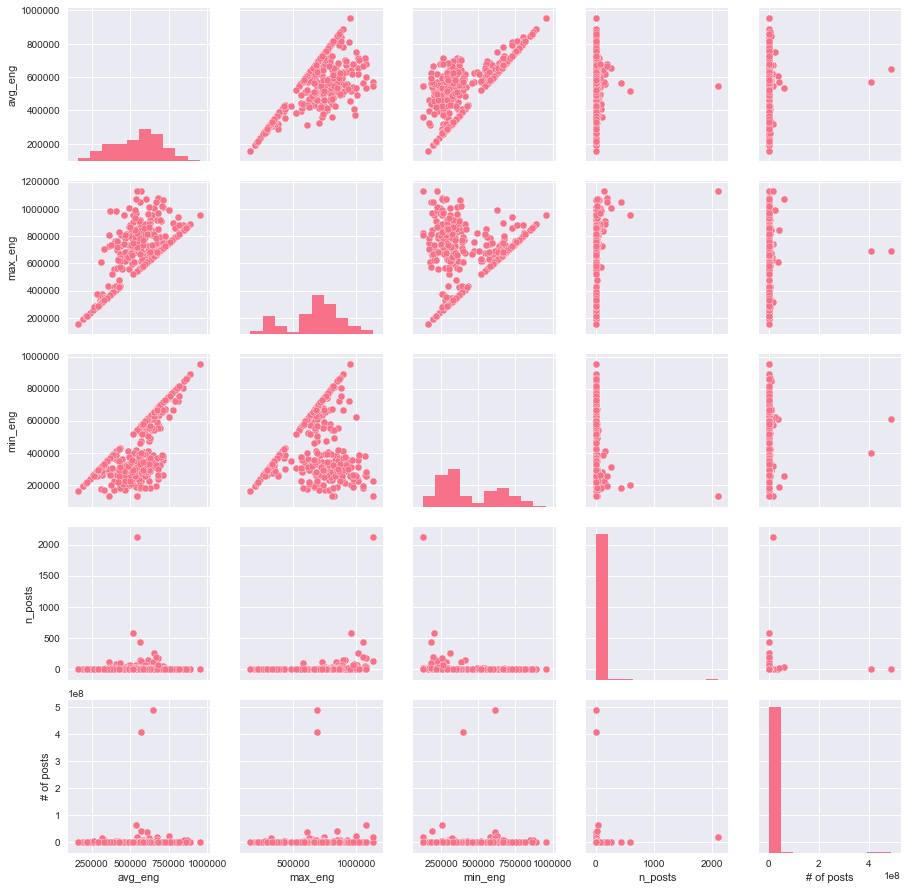

In [10]:
sns.pairplot(hashtag_df)

In [11]:
hashtag_df['# of posts'] = np.log10(hashtag_df['# of posts']+1)
hashtag_df['n_posts'] = np.log10(hashtag_df['n_posts']+1)

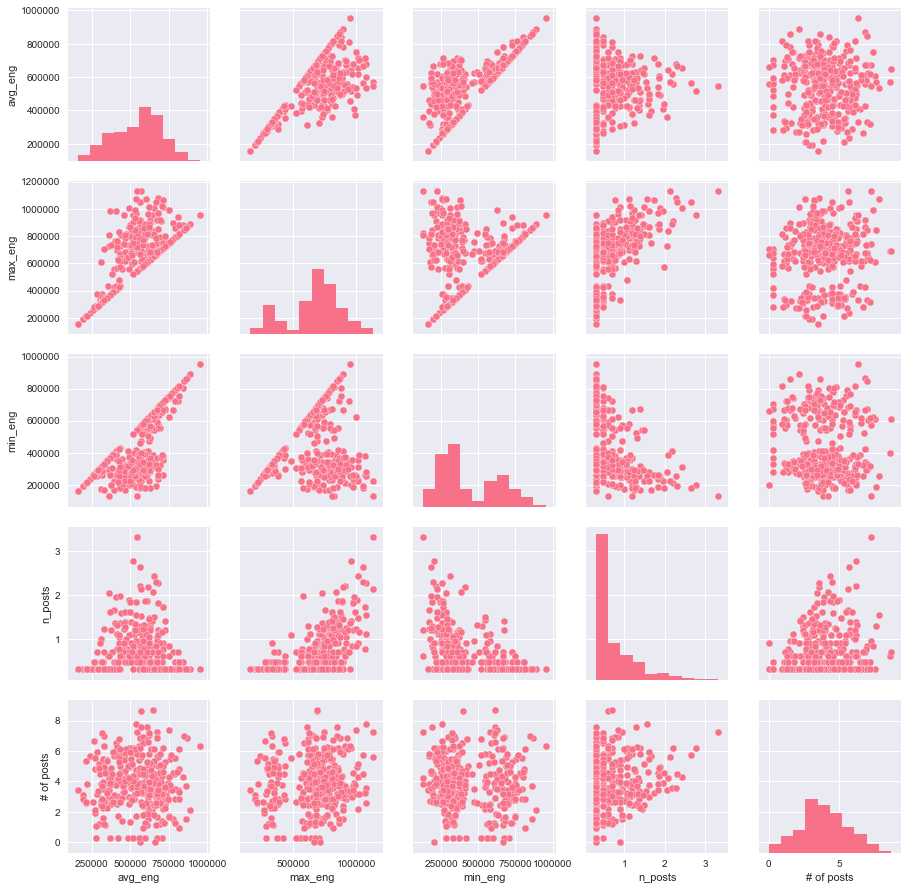

In [12]:
sns.pairplot(hashtag_df)

In [16]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

x = hashtag_df.drop('hashtags',axis=1).values #returns a numpy array #removes missing followers (broken accounts)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)


In [30]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df[4].values.reshape(-1,1))
    distortions.append(kmeanModel.inertia_)

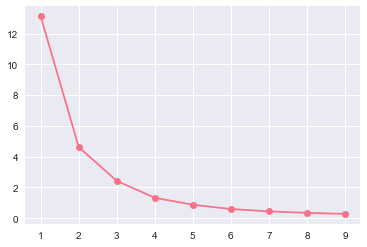

In [31]:
plt.plot(K,distortions,'o-')

In [32]:
kmeanModel = KMeans(n_clusters=4).fit(df[4].values.reshape(-1,1))

hashtag_df['tempCluster'] = kmeanModel.labels_

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


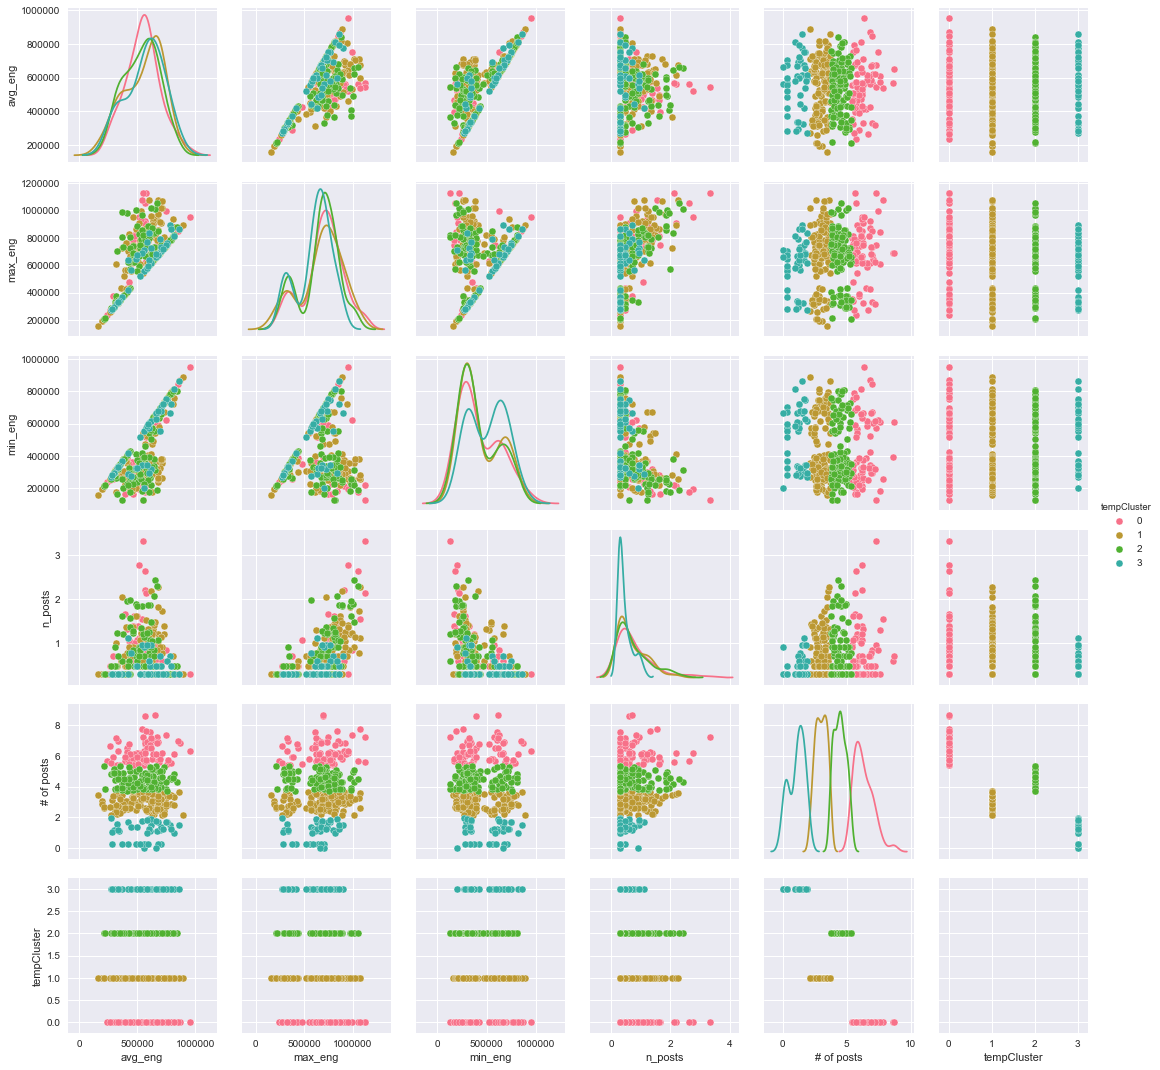

In [33]:
sns.pairplot(hashtag_df,hue='tempCluster',diag_kind='kde')

In [34]:
hashtag_df

,avg_eng,hashtags,max_eng,min_eng,n_posts,# of posts,tempCluster
0,561512.662420,#nbafinals,909585,213824,2.198657,6.216565,0
1,722540.000000,#gatoradezero,722540,722540,0.301030,2.939519,1
2,517760.528814,#nbaplayoffs,954448,198217,2.771587,6.175109,0
3,363438.486486,#tripledoublealert,729066,281503,2.049218,3.461348,1
4,590180.000000,#powerbeatspro,775600,404760,0.477121,3.213252,1
5,563701.000000,#legendarymoments,833726,357280,1.146128,3.894925,2
6,618668.694805,#nbabreakdown,890873,412240,2.190332,3.550962,1
7,438375.567568,#nbaawards,807274,251554,1.579784,4.596861,2
8,624522.750000,#nbacombine,690297,471492,0.954243,3.502564,1
9,569828.666667,#nbaplaymakers,757785,471492,0.602060,2.641474,1


In [37]:
hashtags = hashtag_df[['hashtags','tempCluster']].copy()

In [42]:
hashtags = pd.get_dummies(hashtags,columns=['tempCluster'])

In [46]:
test = instas.Description.values[6]

'the @warriors locked in for four games to advance to the #nbafinals presented by youtube tv! #gatoradezero'

In [50]:
hashtags

,hashtags,tempCluster_0,tempCluster_1,tempCluster_2,tempCluster_3
0,#nbafinals,1,0,0,0
1,#gatoradezero,0,1,0,0
2,#nbaplayoffs,1,0,0,0
3,#tripledoublealert,0,1,0,0
4,#powerbeatspro,0,1,0,0
5,#legendarymoments,0,0,1,0
6,#nbabreakdown,0,1,0,0
7,#nbaawards,0,0,1,0
8,#nbacombine,0,1,0,0
9,#nbaplaymakers,0,1,0,0


In [97]:
def apply_clusters_to_training(z,hashtags):
    """Apply the clusters to the dataset, now in a form for prediction aligned with the other data. 
   
   """
    
    import re
    from numpy import zeros
    post_clusters = zeros(4)
    tags_in_z =  list( dict.fromkeys(re.findall('#[a-z_0-9]*',z)) ) 
    
    if len(tags_in_z) == 0:
        return post_clusters
    

    for tag_in_z in tags_in_z:
            post_clusters = post_clusters + hashtags[hashtags['hashtags'] == tag_in_z].values[0][1:] 
            
    return post_clusters

In [99]:
instas['tempClusters'] = instas['Description'].apply(lambda z: apply_clusters_to_training(z,hashtags))

In [117]:
clusters = pd.DataFrame(instas.tempClusters.tolist(), columns=['hashtags_nC1', 'hashtags_nC2','hashtags_nC3','hashtags_nC4'])

In [119]:
instas.merge(clusters,left_index=True,right_index=True)

,Engagements,Followers at Posting,Created,Type,Description,tempClusters,hashtags_nC1,hashtags_nC2,hashtags_nC3,hashtags_nC4
0,502093,36984682,2019-05-21 23:30:51 EDT,Video,the @raptors bench trio of @sergeibaka @norman...,"[0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,0.0
1,603380,36984682,2019-05-21 22:53:33 EDT,Video,@kyle_lowry7 pulls from deep for the @raptors ...,"[0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,0.0
2,603380,36984682,2019-05-21 22:19:58 EDT,Video,@k_mid22 with some english on the @bucks dime!,"[0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,0.0
3,725100,36984682,2019-05-21 22:02:41 EDT,Video,kawhi punches it home with the left on tnt!,"[0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,0.0
4,661446,36984682,2019-05-21 20:47:49 EDT,Video,@giannis_an34 goes baseline early to rock the ...,"[0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,0.0
5,322444,36955156,2019-05-21 14:02:32 EDT,Photo,congrats to the 2018-19 nba all-rookie first t...,"[0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,0.0
6,722540,36955156,2019-05-21 12:30:53 EDT,Video,the @warriors locked in for four games to adva...,"[1.0, 1.0, 0.0, 0.0]",1.0,1.0,0.0,0.0
7,339265,36955156,2019-05-21 08:59:02 EDT,Photo,will the @bucks take a commanding 3-1 lead... ...,"[0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,0.0
8,443330,36955156,2019-05-21 00:48:16 EDT,Photo,tap to shop the @warriors western conference c...,"[0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,0.0
9,652193,36955156,2019-05-21 00:38:18 EDT,Video,hey @stephencurry30... that was the first time...,"[1.0, 0.0, 0.0, 0.0]",1.0,0.0,0.0,0.0


And thats how you align cluster designations with predictive modelling. The same will be done for tagged profiles, and we can start exploring what predictive techniques work. 